In [2]:
import picasso.io
import picasso.localize

In [3]:
movie, info = picasso.io.load_movie('Region3-1.tif')
print(info)

[{'Byte Order': '>', 'File': 'c:\\Users\\icedn\\Jupyter\\SelvinLab\\MatLab to Python\\Region3-1.tif', 'Height': 256, 'Width': 254, 'Data Type': 'uint16', 'Frames': 100, 'Micro-Manager Acquisiton Comments': ''}]


In [3]:
movie, info = picasso.io.load_movie('Region3-1.tif')
parameters = {"Box Size": 13, "Min. Net Gradient": 528}

# Localize the movie
localizations = picasso.localize.localize(movie, info, parameters)

# Save the localizations to a file
picasso.io.save_locs('picasso_localizations.yaml', localizations, info)

localizing


TypeError: identify() missing 1 required positional argument: 'box'

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


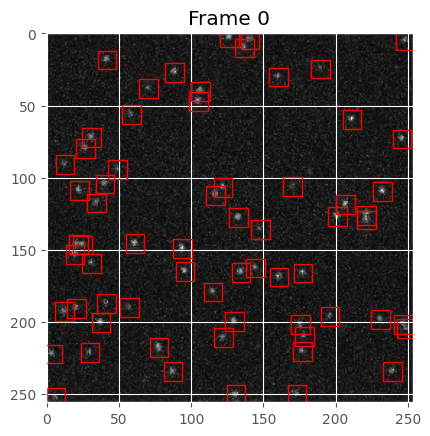

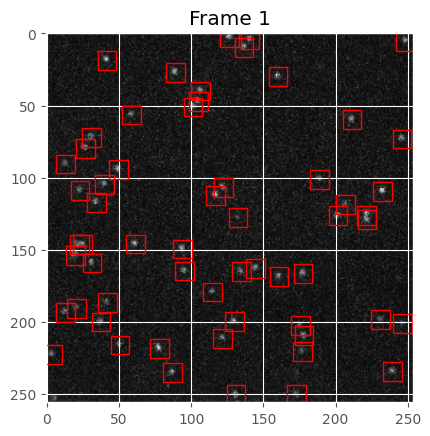

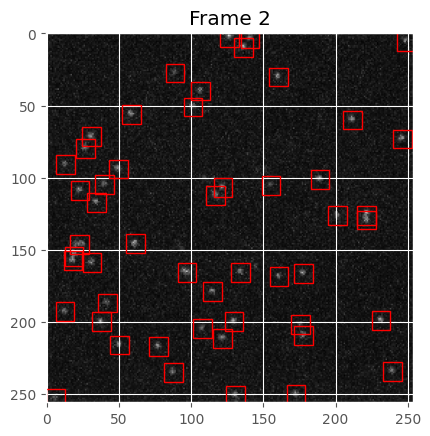

C:\Users\icedn\AppData\Local\Temp\ipykernel_25964\3022718702.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  frames = np.array(frames)


In [21]:
import tifffile
import trackpy as tp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the TIFF movie
movie = tifffile.imread('Region3-1.tif')

# Initialize an empty list to store the frames
frames = []

# Loop through each frame in the movie
for i in range(3):
    # Perform localization on the frame
    frame = tp.locate(movie[i], diameter=7, 
                      minmass=200, max_iterations=100,
                      separation=2)  # Adjust the minmass parameter as needed

    # Add the frame to the list
    frames.append(frame)

    # Plot the frame with the identified features
    fig, ax = plt.subplots(1)
    ax.imshow(movie[i], cmap='gray')

    # Draw a box around each identified feature
    for index, row in frame.iterrows():
        rect = patches.Rectangle((row['x']-6, row['y']-6), 13, 13, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.title(f'Frame {i}')
    plt.show()

# Convert the list of frames to a numpy array
frames = np.array(frames)

# Save the frames to a file
np.save('localizations.npy', frames)


In [15]:
print(frames[1])

              y           x        mass      size       ecc     signal  \
4      3.772305  140.179921  509.322944  1.429487  0.134182  63.153302   
6      4.959162  248.085969  539.452877  1.426081  0.136878  66.218179   
9      8.065854   13.593064  104.681027  1.733187  0.129638   9.205157   
22    16.975000  208.396249  111.466465  1.514781  0.273514  13.713744   
25    18.019828   41.158052  662.500605  1.395192  0.169659  84.387874   
..          ...         ...         ...       ...       ...        ...   
318  233.614519  239.028640  496.470914  1.518718  0.165209  54.880541   
320  234.996039  172.966999  134.388374  1.537411  0.133879  16.548529   
333  244.452016   83.989167  123.279324  1.245797  0.098066  21.502260   
340  249.751573  130.487790  464.530328  1.639631  0.025682  44.508385   
345  249.811065  172.604927  376.620402  1.548912  0.145831  40.297563   

     raw_mass        ep  
4      4476.0  0.068187  
6      4370.0  0.073632  
9      3145.0  0.953486  
22     